In [74]:
import json
import numpy as np
import pandas as pd
from skimage import io
import bigfish.plot as plot
import seaborn as sns
import os
import napari
import tools.view
from pathlib import Path
from matplotlib import pyplot as plt


In [55]:
configfile = '../tests/output/config.json'
with open(configfile, 'r') as f:
    config = json.load(f)

In [56]:
config


{'inputdir': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/input',
 'outputdir': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/output',
 'experiments': [{'strain': 'MG1655',
   'condition': 'LB',
   'images': [{'sourcefile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/input/MG1655_LB_01_CY5, CY3.5 NAR, CY3, DAPI.vsi',
     'rootdir': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/input',
     'basename': 'MG1655_LB_01_CY5, CY3.5 NAR, CY3, DAPI',
     'format': 'vsi',
     'time': {'01-configure': 8.048033952713013,
      '02-segment-DIC': 5.977081060409546,
      '02-segment-DAPI': 4.238142967224121},
     'stem': 'MG1655_LB_01',
     'seqnr': '01',
     'dicbasename': 'MG1655_LB_01_DIC.tif',
     'dicfile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/output/MG1655_LB_01/DIC.tif',
     'inputdicfile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/input/MG1655_LB_01_DIC.tif',
     'cellmaskfile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/output/MG1655_LB_01/D

In [57]:
imgfile = '../tests/output/MG1655_GLU_OD_0.3_left_02/img.json'
with open(imgfile, 'r') as f:
    img = json.load(f)
img

{'sourcefile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/input/MG1655_GLU_OD_0.3_left_CY5, CY3.5 NAR, CY3, DAPI_02.vsi',
 'rootdir': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/input',
 'basename': 'MG1655_GLU_OD_0.3_left_CY5, CY3.5 NAR, CY3, DAPI_02',
 'format': 'vsi',
 'time': {'01-configure': 7.00096583366394,
  '02-segment-DIC': 4.642106294631958,
  '02-segment-DAPI': 4.180879831314087,
  '03-detect-spots': 81.20883584022522},
 'stem': 'MG1655_GLU_OD_0.3_left_02',
 'seqnr': '02',
 'dicbasename': 'MG1655_GLU_OD_0.3_left_DIC_02.tif',
 'dicfile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/output/MG1655_GLU_OD_0.3_left_02/DIC.tif',
 'inputdicfile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/input/MG1655_GLU_OD_0.3_left_DIC_02.tif',
 'cellmaskfile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/output/MG1655_GLU_OD_0.3_left_02/DIC_masks.tif',
 'nuclearmaskfile': '/Users/adele/PycharmProjects/Ecoli_smFISH/tests/output/MG1655_GLU_OD_0.3_left_02/DAPI_masks.tif',


In [58]:
# load image data
imgdir = config['outputdir']
mrna = 'rpoD'
mrna_data = io.imread(img[mrna]['rnafile'])
cell_mask_data = io.imread(img['cellmaskfile'])
spots = np.load(img[mrna]['spotsfile'])
mrna_filtered_padded = np.load(img[mrna]['filteredpaddedmrnafile'])
mrna_zprojected = np.load(img[mrna]['zprojectmrnafile'])

In [59]:
spots

array([[   13.,    17.,   464.,  5732.,   690.],
       [   13.,   165.,   237.,  7843.,  1853.],
       [   14.,   174.,  1366.,  5123.,  1011.],
       ...,
       [   21.,    31.,   498.,  9991.,  3252.],
       [   21.,  2043.,  1626., 10995.,  3082.],
       [   23.,   724.,   815., 12403.,  1791.]])

In [60]:

ifx_1 = img[mrna]["ifx_1"]
ifx_2 = img[mrna]["ifx_2"]
z_max_focus = img[mrna]["z_max_focus"]
ifx_1, ifx_2, z_max_focus


(6, 31, 16)

In [61]:
viewer = napari.Viewer()
tools.view.import_layers(Path(config['outputdir']) / img['stem'], mode='spots', viewer=viewer)

10/28/2024 06:38:57PM [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate' 


In [62]:
scale = (200, 65, 65)
spot_radius = (1250, 170, 170)
sigma = (0.75, 2.3, 2.3)
patch_size = (200, 200)

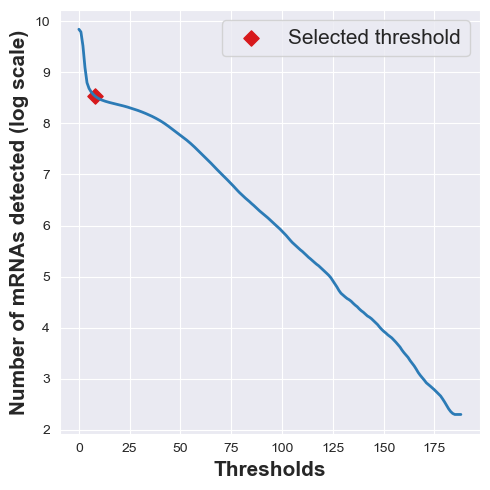

In [63]:
plot.plot_elbow(
    images=mrna_filtered[ifx_1:ifx_2, ...], 
    voxel_size=scale, 
    spot_radius=spot_radius)

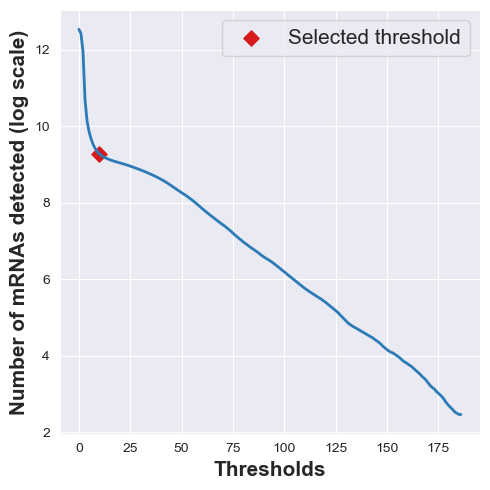

In [14]:
plot.plot_elbow(
    images=mrna_filtered, 
    voxel_size=scale, 
    spot_radius=spot_radius)

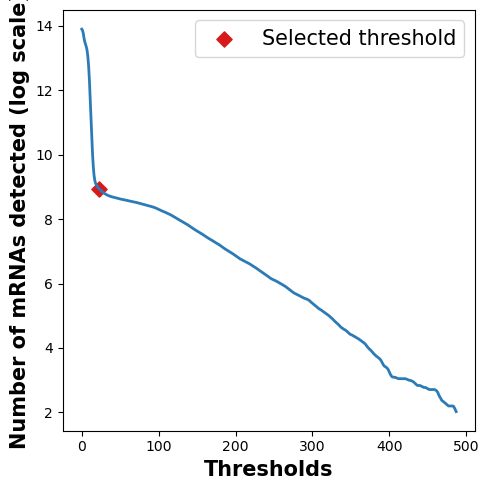

In [31]:
plot.plot_elbow(
    images=mrna_data, 
    voxel_size=scale, 
    spot_radius=spot_radius)

In [85]:
# Plot histogram of pixel value for pixels that lies within a selected spot
# This distribution should show one sharp peak, or maybe two peaks after spot decomposition if Tx's are visible
spots = np.load('../tests/output/MG1655_GLU_OD_0.3_left_02/rpoD_spots_thr=10_ifx1=6_ifx2=31.npy')
df = pd.DataFrame(spots, columns=['z', 'y', 'x', 'intensity', 'filtered_intensity'])

df.sort_values(by=['z', 'y', 'x'], ascending=True, inplace=True)
df


,z,y,x,intensity,filtered_intensity
0,13.0,17.0,464.0,5732.0,690.0
7,13.0,85.0,50.0,8022.0,2006.0
1,13.0,165.0,237.0,7843.0,1853.0
3,13.0,255.0,200.0,4667.0,760.0
17,13.0,1016.0,109.0,4662.0,580.0
...,...,...,...,...,...
4765,20.0,2048.0,1628.0,13512.0,5334.0
4766,21.0,31.0,498.0,9991.0,3252.0
4763,21.0,1491.0,1424.0,10116.0,2036.0
4767,21.0,2043.0,1626.0,10995.0,3082.0


In [5]:
1250/pow(2, 0.5)

883.8834764831844

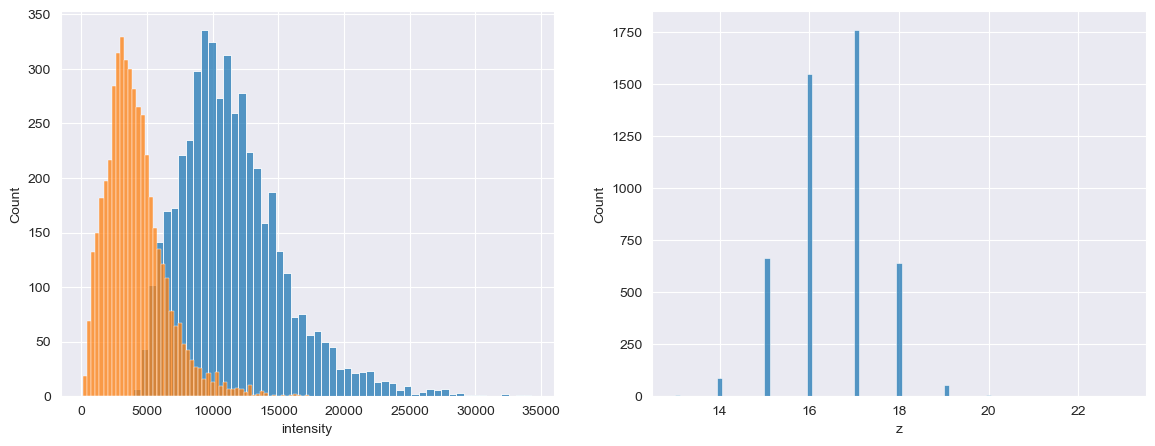

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df, x='intensity', ax=ax[0]);
sns.histplot(df, x='filtered_intensity', ax=ax[0]);
sns.histplot(df, x='z', ax=ax[1]);

In [81]:
df.sort_values(by=['intensity'], ascending=True, inplace=False)

,z,y,x,intensity,filtered_intensity
2571,17.0,2282.0,2228.0,3379.0,591.0
194,16.0,0.0,1953.0,4134.0,119.0
4169,18.0,2286.0,2283.0,4151.0,1146.0
943,15.0,2214.0,2296.0,4306.0,911.0
218,17.0,47.0,2271.0,4357.0,455.0
...,...,...,...,...,...
1790,16.0,1103.0,448.0,30370.0,13613.0
1633,16.0,879.0,1593.0,31997.0,15861.0
1815,16.0,1143.0,798.0,32198.0,16288.0
1942,16.0,1296.0,1148.0,33491.0,16172.0


In [69]:
spots

array([[1.6000e+01, 0.0000e+00, 3.6500e+02, 5.0550e+03, 3.9400e+02],
       [1.6000e+01, 1.2000e+01, 1.0530e+03, 1.2651e+04, 5.0050e+03],
       [1.6000e+01, 2.8000e+01, 6.6800e+02, 7.0680e+03, 1.9200e+03],
       ...,
       [2.0000e+01, 2.3030e+03, 1.7960e+03, 4.4210e+03, 5.6900e+02],
       [2.0000e+01, 2.3030e+03, 1.9080e+03, 6.1800e+03, 6.3300e+02],
       [2.0000e+01, 2.3030e+03, 2.1330e+03, 7.4720e+03, 2.2160e+03]])

In [97]:
# Plot histogram of pixel value for pixels that lies within a selected spot
# This distribution should show one sharp peak, or maybe two peaks after spot decomposition if Tx's are visible
# spots = np.load('../tests/output/MG1655_GLU_OD_0.3_left_02/rpoD_spots_thr=15.0_ifx1=12_ifx2=21.npy')
# spots = np.load('../tests/output/MG1655_GLU_OD_0.3_left_02/rpoD_spots_thr=10_ifx1=12_ifx2=20.npy')
spots = np.load('../tests/output/MG1655_GLU_OD_0.3_left_02/rpoD_spots_thr=15_ifx1=6_ifx2=31.npy')

df = pd.DataFrame(spots, columns=['z', 'y', 'x', 'intensity', 'filtered_intensity'])

df.sort_values(by=['z', 'y', 'x'], ascending=True, inplace=True)
df


,z,y,x,intensity,filtered_intensity
2,13.0,85.0,50.0,8022.0,2006.0
0,13.0,165.0,237.0,7843.0,1853.0
1,13.0,255.0,200.0,4667.0,760.0
9,14.0,20.0,1022.0,9965.0,3063.0
14,14.0,36.0,394.0,11556.0,3436.0
...,...,...,...,...,...
4497,20.0,2048.0,1628.0,13512.0,5334.0
4498,21.0,31.0,498.0,9991.0,3252.0
4495,21.0,1491.0,1424.0,10116.0,2036.0
4499,21.0,2043.0,1626.0,10995.0,3082.0


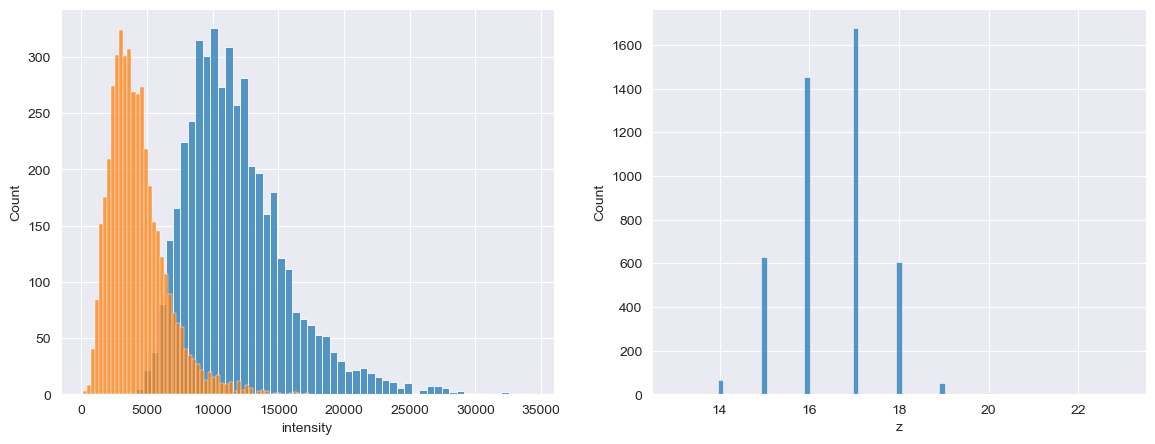

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df, x='intensity', ax=ax[0]);
sns.histplot(df, x='filtered_intensity', ax=ax[0]);
sns.histplot(df, x='z', ax=ax[1]);

In [92]:
df.sort_values(by=['intensity'], ascending=True, inplace=False)

,z,y,x,intensity,filtered_intensity
1304,20.0,17.0,2246.0,3004.0,0.0
3946,20.0,2269.0,2093.0,3018.0,0.0
3953,20.0,2276.0,23.0,3030.0,308.0
3196,20.0,1682.0,2163.0,3177.0,0.0
174,17.0,2287.0,26.0,3251.0,470.0
...,...,...,...,...,...
3002,20.0,1524.0,674.0,19878.0,1958.0
108,16.0,1484.0,658.0,20688.0,9930.0
2651,20.0,1253.0,789.0,21635.0,7171.0
148,16.0,546.0,883.0,22620.0,10412.0


## Needs redoing after reprocessing data:

In [24]:
with open(configfile, 'r') as f:
    config_post = json.load(f)

In [25]:
df = pd.DataFrame()
for exp in config_post['experiments']:
    # print(f'{exp["strain"]}_{exp["condition"]}')
    for img in exp['images']:
        # print(f'{img["sourcefile"]}')
        for mrna in ['rpoD', 'rnlAB', 'hipBA']:
            # print(f'{mrna}')
            df = pd.concat([df, pd.DataFrame({
                'condition': exp['condition'],
                'img': img['stem'],
                'mrna': mrna,
                'ifx_1': img[mrna]['ifx_1'],
                'ifx_2': img[mrna]['ifx_2'],
                'focus': img[mrna]['z_max_focus'],
                'threshold': img[mrna]['spot_detection_threshold'],
                'nr_spots': img[mrna]['number_of_spots'],
            }, index=[0])])
            
            

conditions = [
    {'label': 'LB', 'mu': 2.3},
    {'label': 'GLU', 'mu': 0.54},
    {'label': 'GLY', 'mu': 0.32},
    {'label': 'GAL', 'mu': 0.17},
    {'label': 'MAN', 'mu': 0.12},
]
mrna_ordered = ['rpoD', 'hipBA', 'rnlAB']
csources_ordered = [c['label'] for c in conditions]
csources_ordered

def split_parts(s):
    parts = s. split('_')
    return parts[1][:3], parts[-1]

df[['csource', 'seqnr']] = df.apply(lambda r: split_parts(r['img']), axis=1, result_type='expand')
df = df[['csource', 'seqnr', 'mrna', 'ifx_1', 'ifx_2', 'focus', 'threshold', 'nr_spots']]
df

KeyError: 'spot_detection_threshold'

In [110]:
df.query('mrna == "hipBA"').sort_values(by=['csource', 'seqnr'])

,csource,seqnr,mrna,ifx_1,ifx_2,focus,threshold,nr_spots
0,GAL,01,hipBA,7,31,17,28.000000,157
0,GAL,05,hipBA,14,38,24,32.000000,71
0,GAL,06,hipBA,11,35,21,40.000000,38
0,GLU,01,hipBA,4,30,15,49.000000,192
0,GLU,02,hipBA,5,29,15,58.000000,92
0,GLU,03,hipBA,4,28,13,50.000000,139
0,GLY,08,hipBA,9,33,19,41.000000,87
0,GLY,16,hipBA,2,28,14,41.000000,59
0,GLY,17,hipBA,7,31,16,30.000000,130
0,LB,01,hipBA,12,35,22,23.000000,235


In [120]:
df.query('mrna == "rnlAB"').sort_values(by=['csource', 'seqnr'])

,csource,seqnr,mrna,ifx_1,ifx_2,focus,threshold,nr_spots
0,GAL,01,rnlAB,5,30,16,15.151515,299
0,GAL,05,rnlAB,16,40,26,24.363636,54
0,GAL,06,rnlAB,11,37,22,17.454545,197
0,GLU,01,rnlAB,8,31,18,8.272727,2056
0,GLU,02,rnlAB,5,29,15,9.333333,1647
0,GLU,03,rnlAB,4,28,14,21.555556,497
0,GLY,08,rnlAB,10,34,20,14.000000,333
0,GLY,16,rnlAB,4,29,14,21.000000,103
0,GLY,17,rnlAB,8,32,18,16.000000,220
0,LB,01,rnlAB,6,33,18,19.000000,2170


In [105]:
df.query('csource == "GLU"').query('seqnr == "02"')

,csource,seqnr,mrna,ifx_1,ifx_2,focus,threshold,nr_spots
0,GLU,02,rpoD,7,31,17,10.000000,4773
0,GLU,02,rnlAB,5,29,15,9.333333,1647
0,GLU,02,hipBA,5,29,15,58.000000,92


In [111]:
df.query('csource == "GLU"').query('seqnr == "01"')

,csource,seqnr,mrna,ifx_1,ifx_2,focus,threshold,nr_spots
0,GLU,01,rpoD,9,31,19,10.000000,5970
0,GLU,01,rnlAB,8,31,18,8.272727,2056
0,GLU,01,hipBA,4,30,15,49.000000,192


### Histogram of selected spots intensities